# step1: Data collection

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
import time 
from collections import Counter
import os
   

In [2]:
from sklearn.exceptions import ConvergenceWarning
from sklearn import preprocessing 
from sklearn import tree
from sklearn import linear_model
from imblearn.under_sampling import RandomUnderSampler

In [3]:
#Block warnings
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# loading the dataset
traffic_data = pd.read_csv('C://Users//getac//Documents//Thesis file//Dataset//road_traffic_accident_data.csv',header=0)
traffic_data.head()

Time Day_of_week Age_band_of_driver Drivers_gender   Educational_level  \
0  17:02:00      Monday              18-30           Male   Above high school   
1  17:02:00      Monday              31-50           Male  Junior high school   
2  17:02:00      Monday              18-30           Male  Junior high school   
3   1:06:00      Sunday              18-30           Male  Junior high school   
4   1:06:00      Sunday              18-30           Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Number_of_casualties  \
0            Owner              Above 10yr  ...                    2   
1            Owner                 5-10yrs  ...                    2   
2            Owner                     NaN  ...                    2   
3     Governmental                     NaN  ...                    2   
4            Owner                 5-10yrs  ...                    2   

  Vehicle_movement   Casualty_class Casualty_gender Age_band_of_casualty  \
0   Going straight               na              na                   na   
1   Going straight               na              na                   na   
2   Going straight  Driver or rider            Male                31-50   
3   Going straight       Pedestrian          Female                18-30   
4   Going straight               na              na                   na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 31 columns]

# Step2: Data preprocessing


##  A: Data cleaning
    Data cleaning consistes:
        - removing unwanted data
        - dealing missing values, 
        - removing less important rows and columns
        - removing duplicate values     
        we might even have to restructure the dataset and change the rows and columns or index of rows and columns.

In [5]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063 entries, 0 to 13062
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         13063 non-null  object
 1   Day_of_week                  13063 non-null  object
 2   Age_band_of_driver           13063 non-null  object
 3   Drivers_gender               13063 non-null  object
 4   Educational_level            12297 non-null  object
 5   Vehicle_driver_relation      12464 non-null  object
 6   Driving_experience           12187 non-null  object
 7   Type_of_vehicle              12096 non-null  object
 8   Owner_of_vehicle             12555 non-null  object
 9   Service_year_of_vehicle      9073 non-null   object
 10  Defect_of_vehicle            8496 non-null   object
 11  Area_accident_occured        12823 non-null  object
 12  Lanes_or_Medians             12586 non-null  object
 13  Road_allignment              12

In [6]:
traffic_data.describe

<bound method NDFrame.describe of            Time Day_of_week Age_band_of_driver Drivers_gender  \
0      17:02:00      Monday              18-30           Male   
1      17:02:00      Monday              31-50           Male   
2      17:02:00      Monday              18-30           Male   
3       1:06:00      Sunday              18-30           Male   
4       1:06:00      Sunday              18-30           Male   
...         ...         ...                ...            ...   
13058  16:00:00    Thursday              18-30           Male   
13059  19:00:00      Friday              18-30           Male   
13060  18:00:00    Saturday            Unknown           Male   
13061  23:30:00     Tuesday              31-50         Female   
13062  23:30:00     Tuesday              18-30           Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                

In [7]:
import json

# Create a dictionary to store unique categories
unique_categories_dict = {}

# Extract and store unique categories of each column
for column in traffic_data.columns:
    if traffic_data[column].dtype == 'object':
        unique_categories = list(set(traffic_data[column].unique()))
        unique_categories_dict[column] = unique_categories

# Print the unique categories in the desired format
output_str = json.dumps(unique_categories_dict, indent=4)
print("RTA dataset unique categories")
for line in output_str.split('\n'):
    print(f"    {line}")

RTA dataset unique categories
    {
        "Time": [
            "12:19:00",
            "23:15:00",
            "9:51:00",
            "13:22:00",
            "11:49:00",
            "16:41:00",
            "15:33:00",
            "19:24:00",
            "10:12:00",
            "13:04:00",
            "0:57:00",
            "8:31:00",
            "2:44:00",
            "9:07:00",
            "17:18:00",
            "21:19:00",
            "9:15:00",
            "20:52:00",
            "23:19:00",
            "4:05:00",
            "22:28:00",
            "8:36:00",
            "16:31:00",
            "17:05:00",
            "11:28:00",
            "19:45:00",
            "7:53:00",
            "9:28:00",
            "21:00:00",
            "2:10:00",
            "20:50:00",
            "20:31:00",
            "6:15:00",
            "13:20:00",
            "10:19:00",
            "1:49:00",
            "18:36:00",
            "6:20:00",
            "10:32:00",
            "1:30:00",
 

### i.  Dealing Missing Value
    When the dataset includes missing values, they need to be rejected or replaced before fitting this data into the model. 
    Pandas provides some useful functions to deal with this problem.

In [8]:
#calculate total number of missing value 
print('The dataset has total of',traffic_data.isnull().sum().sum(),'Missing Values')

The dataset has total of 19774 Missing Values


In [9]:
#identifying collumns and rows that contain missing value with table
def missing_values_table(traffic_data):
    # Total missing values
    mis_val = traffic_data.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * traffic_data.isnull().sum() / len(traffic_data)

    # Create a DataFrame with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table.columns = ['Missing Values', '% of Total Values']

    # Sort the table by percentage of missing values (descending)
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print summary information
    print(f"The dataset has {traffic_data.shape[1]} columns.")
    print(f"There are {mis_val_table.shape[0]} columns that have missing values.\n")
    
    # Return the DataFrame with missing information
    return mis_val_table
missing_values_table(traffic_data)

The dataset has 31 columns.
There are 14 columns that have missing values.



Missing Values  % of Total Values
Defect_of_vehicle                  4567               35.0
Service_year_of_vehicle            3990               30.5
Work_of_casuality                  3382               25.9
Fitness_of_casuality               2795               21.4
Type_of_vehicle                     967                7.4
Driving_experience                  876                6.7
Educational_level                   766                5.9
Vehicle_driver_relation             599                4.6
Owner_of_vehicle                    508                3.9
Lanes_or_Medians                    477                3.7
Vehicle_movement                    308                2.4
Area_accident_occured               240                1.8
Type_of_collision                   155                1.2
Road_allignment                     144                1.1

<Axes: >

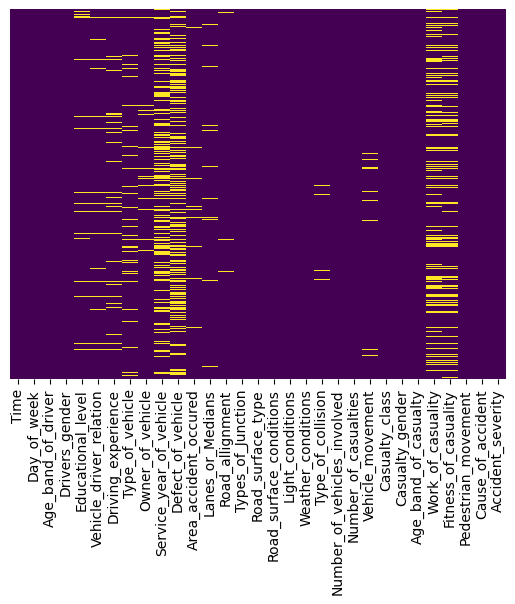

In [10]:
#identify distrbution of missing value relative to total data used in the study
sns.heatmap(traffic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# handling missing values by replacing null value with Unknown
attributes_with_missing = traffic_data.columns[traffic_data.isnull().any()]

# Function to replace missing categorical values with "Unknown"
def impute_categorical_missing(traffic_data, attributes):
    for attribute in attributes:
        traffic_data[attribute] = traffic_data[attribute].fillna("Unknown")

# Call the function to replace missing values with "Unknown" category
impute_categorical_missing(traffic_data, attributes_with_missing)
print(traffic_data.isnull().sum().sum(), "Missing value: All the missing values are handled")


0 Missing value: All the missing values are handled


### ii. Removing Duplicated Value
    we need to remove duplicated data if it is exists because of less-important for model training

In [12]:
# Removing duplicated value
traffic_data.duplicated().sum()

0

In [13]:
traffic_data.head()

Time Day_of_week Age_band_of_driver Drivers_gender   Educational_level  \
0  17:02:00      Monday              18-30           Male   Above high school   
1  17:02:00      Monday              31-50           Male  Junior high school   
2  17:02:00      Monday              18-30           Male  Junior high school   
3   1:06:00      Sunday              18-30           Male  Junior high school   
4   1:06:00      Sunday              18-30           Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr              Unknown   

  Owner_of_vehicle Service_year_of_vehicle  ... Number_of_casualties  \
0            Owner              Above 10yr  ...                    2   
1            Owner                 5-10yrs  ...                    2   
2            Owner                 Unknown  ...                    2   
3     Governmental                 Unknown  ...                    2   
4            Owner                 5-10yrs  ...                    2   

  Vehicle_movement   Casualty_class Casualty_gender Age_band_of_casualty  \
0   Going straight               na              na                   na   
1   Going straight               na              na                   na   
2   Going straight  Driver or rider            Male                31-50   
3   Going straight       Pedestrian          Female                18-30   
4   Going straight               na              na                   na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0           Unknown              Unknown    Not a Pedestrian   
1           Unknown              Unknown    Not a Pedestrian   
2            Driver              Unknown    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4           Unknown              Unknown    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 31 columns]

### iii. Removing irrelevant data
    Removing less important features to predict the accident severity           inorder to enhance the model performance

In [14]:
# removing irellevant features
traffic_data.drop(['Casualty_class',
                   'Casualty_gender',
                   'Age_band_of_casualty',
                   'Work_of_casuality',
                   'Fitness_of_casuality'
                  ], axis=1, inplace=True)

In [15]:
traffic_data.head(3)

Time Day_of_week Age_band_of_driver Drivers_gender   Educational_level  \
0  17:02:00      Monday              18-30           Male   Above high school   
1  17:02:00      Monday              31-50           Male  Junior high school   
2  17:02:00      Monday              18-30           Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   

  Owner_of_vehicle Service_year_of_vehicle  ... Road_surface_conditions  \
0            Owner              Above 10yr  ...                     Dry   
1            Owner                 5-10yrs  ...                     Dry   
2            Owner                 Unknown  ...                     Dry   

  Light_conditions Weather_conditions  \
0         Daylight             Normal   
1         Daylight             Normal   
2         Daylight             Normal   

                         Type_of_collision Number_of_vehicles_involved  \
0  Collision with roadside-parked vehicles                           2   
1           Vehicle with vehicle collision                           2   
2          Collision with roadside objects                           2   

  Number_of_casualties Vehicle_movement Pedestrian_movement  \
0                    2   Going straight    Not a Pedestrian   
1                    2   Going straight    Not a Pedestrian   
2                    2   Going straight    Not a Pedestrian   

           Cause_of_accident Accident_severity  
0            Moving Backward     Slight Injury  
1                 Overtaking     Slight Injury  
2  Changing lane to the left    Serious Injury  

[3 rows x 26 columns]

## B. Explatory Data analysis

In [16]:
# The selected features are:
traffic_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Drivers_gender',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [17]:
# count the number of each catagory of targere variable
print(traffic_data['Accident_severity'].value_counts())

Slight Injury     10776
Serious Injury     1976
Fatal injury        311
Name: Accident_severity, dtype: int64


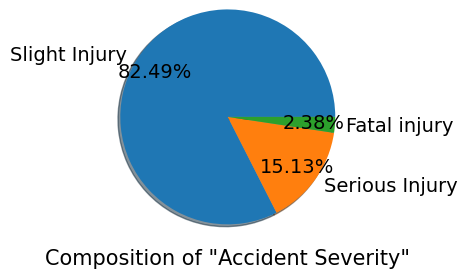

In [18]:
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(traffic_data["Accident_severity"].value_counts(),
        labels=list(traffic_data["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

<Axes: >

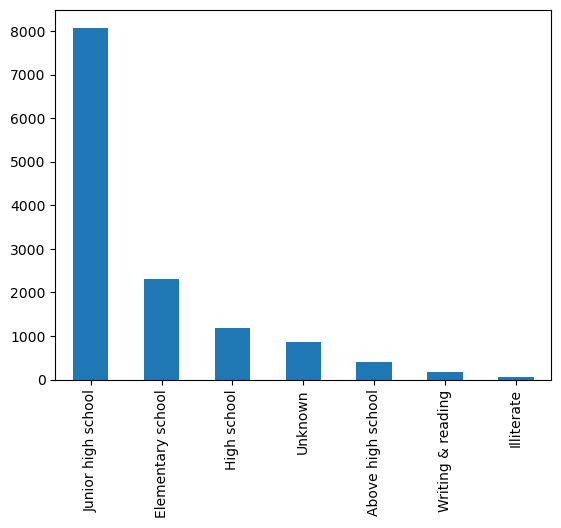

In [19]:
traffic_data['Educational_level'].value_counts().plot(kind='bar')

In [20]:
#pip install dabl


Target looks like classification
Showing only top 10 of 24 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 None,
 array([[<Axes: title={'center': 'Area_accident_occured'}>,
         <Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Pedestrian_movement'}>,
         <Axes: title={'center': 'Number_of_casualties'}>],
        [<Axes: title={'center': 'Type_of_collision'}>,
         <Axes: title={'center': 'Lanes_or_Medians'}>,
         <Axes: title={'center': 'Weather_conditions'}>,
         <Axes: title={'center': 'Light_conditions'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>]], dtype=object)]

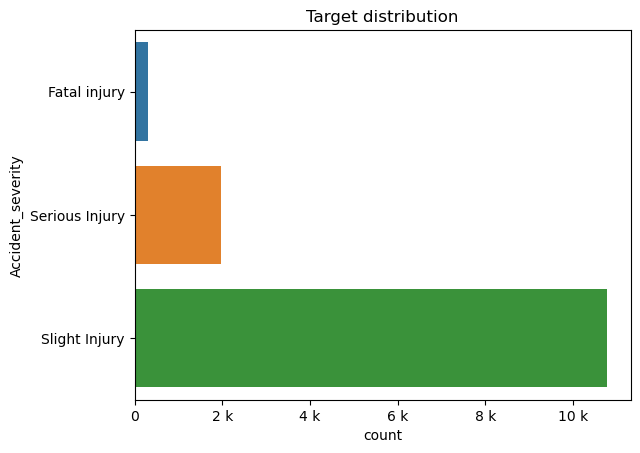

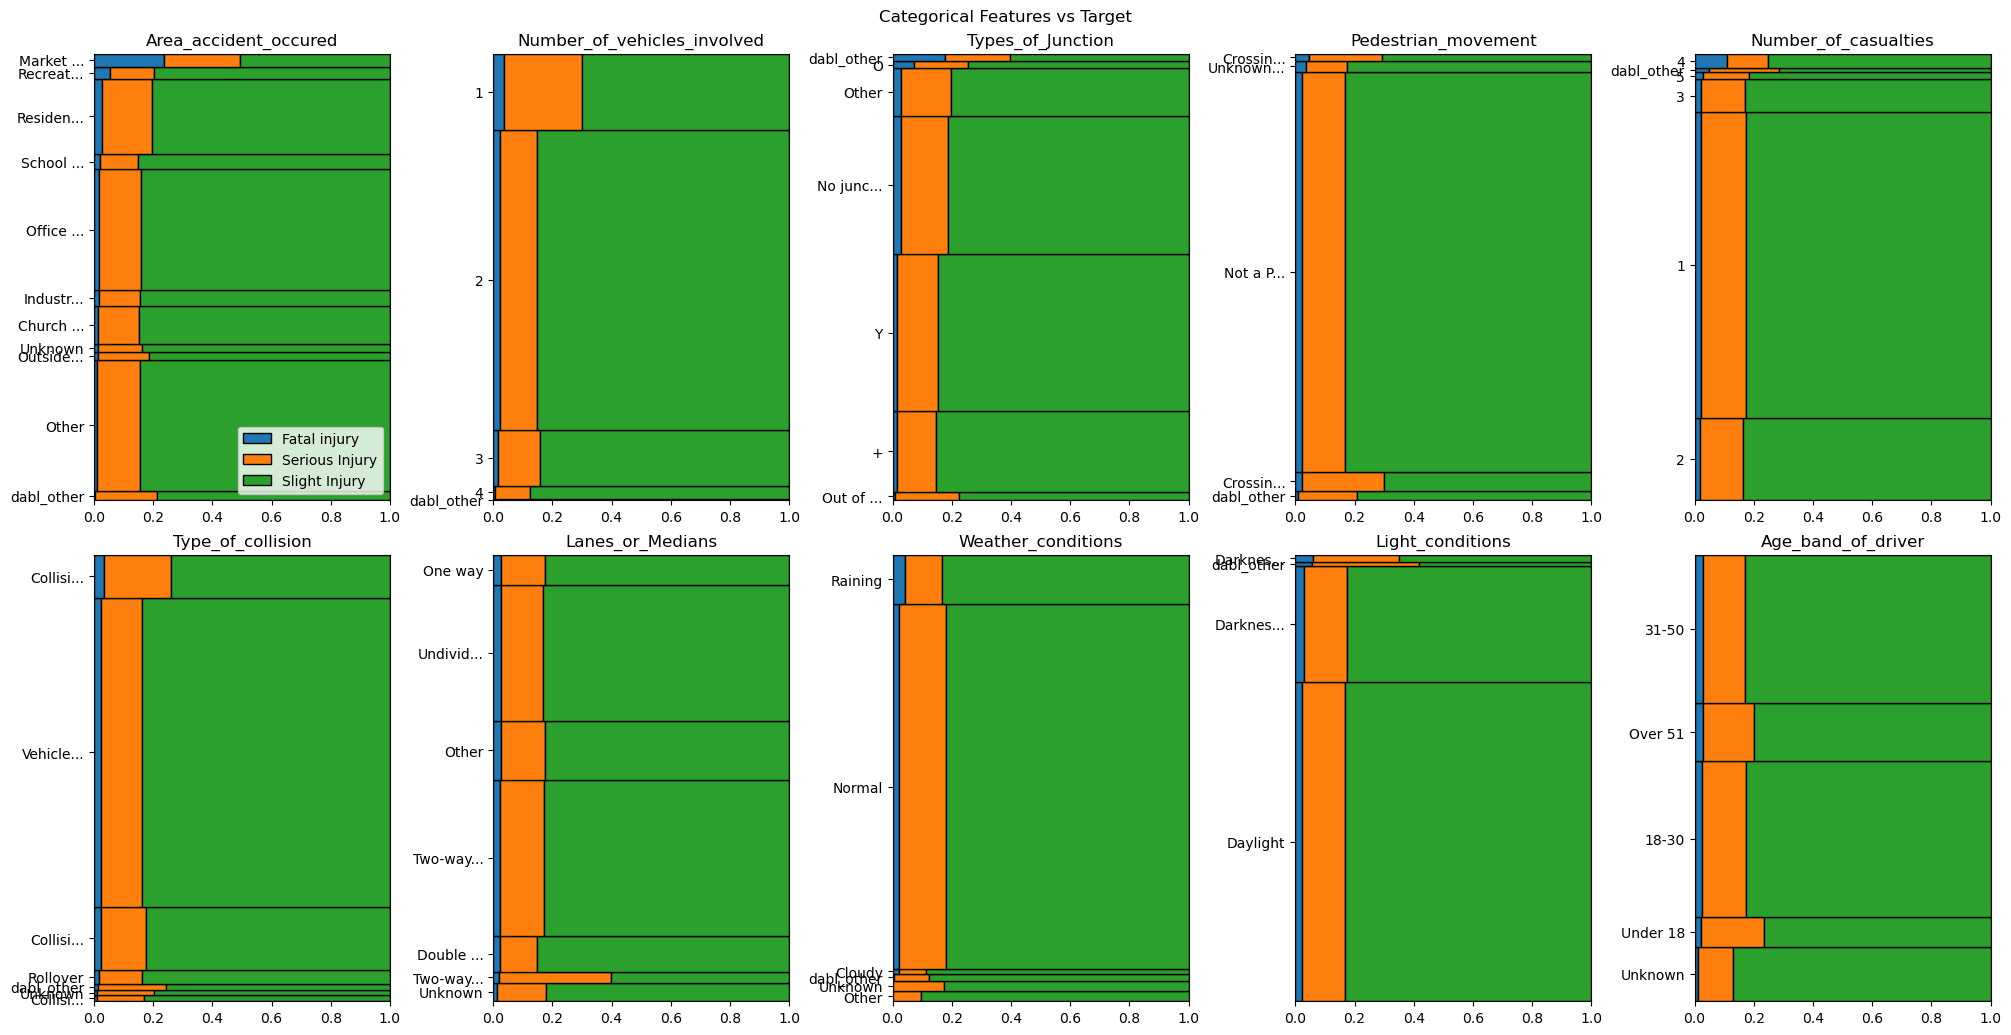

In [21]:
import dabl
dabl.plot(traffic_data, target_col='Accident_severity')

In [22]:
traffic_data.corr()

Number_of_vehicles_involved  Number_of_casualties
Number_of_vehicles_involved                      1.00000               0.21014
Number_of_casualties                             0.21014               1.00000

#### Some Insights from the Initial Data Analysis:
- More the Number of casualties, higher the chances of fatal injuries at accident site
- More the vehicles involved higher the chances of Serious injury
- Light_conditions being darkness can cause higher serious injury
- data is highly imbalanced
- Features like `area_accident_occured`, `Cause_of_accident`, `Day_of_week`, `type_of_junction` seem to be imporatant features causing fatal injuries 
- Road_surface and road conditions do not affect fatal or serious accidents apparently 

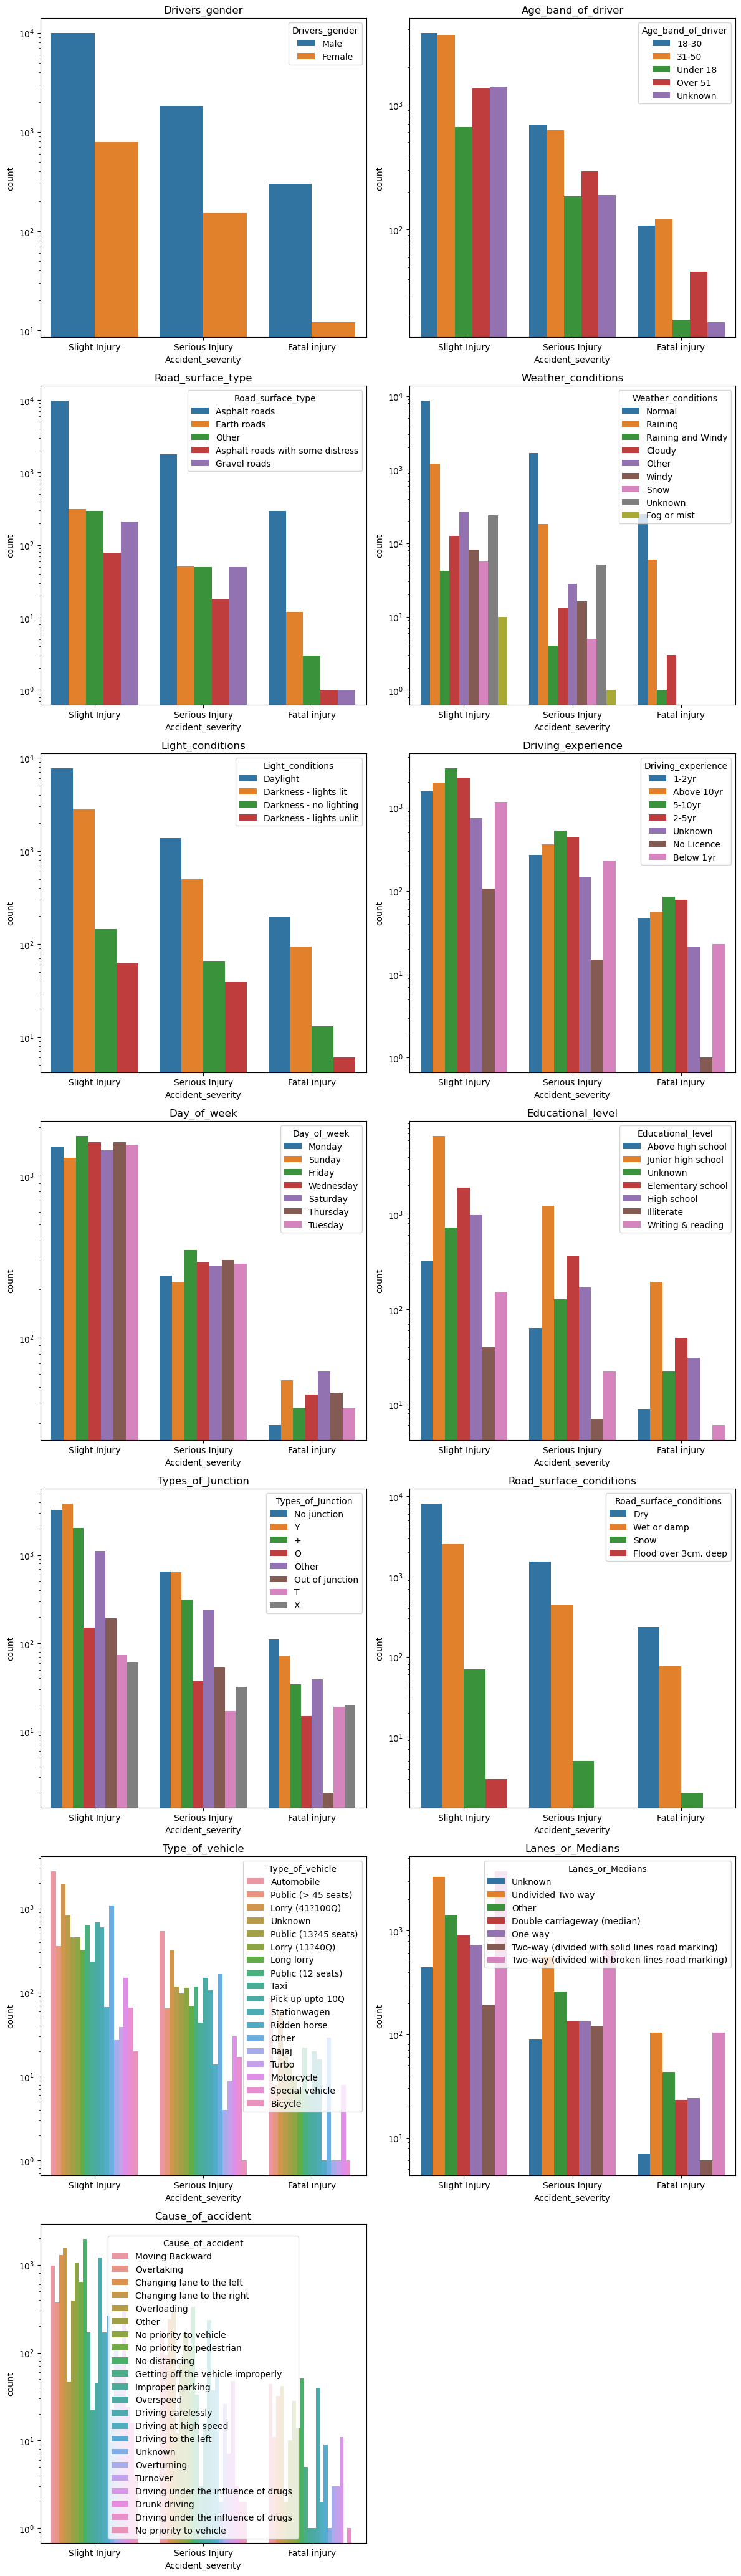

In [23]:
#visualize some attrbutes of traffic accident data
def create_countplot_with_hue(traffic_data, target_column, columns_to_plot):
    num_plots = len(columns_to_plot)
    num_cols = 2  # Number of columns for subplots
    num_rows = (num_plots + 1) // 2  # Number of rows for subplots
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
    
    for i, column in enumerate(columns_to_plot):
        row = i // num_cols
        col = i % num_cols
        
        sns.countplot(x=traffic_data[target_column], hue=traffic_data[column], ax=axes[row, col])
        axes[row, col].set_title(f"{column}")
        axes[row, col].set_yscale('log')  # Apply logarithmic scale to the y-axis
    
    # Remove any empty subplots
    for i in range(num_plots, num_cols * num_rows):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()

# List of columns to create countplots for
columns_to_plot = ['Drivers_gender', 
                   'Age_band_of_driver', 
                   'Road_surface_type', 
                   'Weather_conditions',
                   'Light_conditions', 
                   'Driving_experience', 
                   'Day_of_week', 
                   'Educational_level', 
                   'Types_of_Junction', 
                   'Road_surface_conditions',
                   'Type_of_vehicle',
                   'Lanes_or_Medians', 
                   'Cause_of_accident'
                  ] 

# Call the function to create countplots with hue
create_countplot_with_hue(traffic_data, 'Accident_severity', columns_to_plot)

## C. Data Encoding and Transformetion

In [24]:
# Convert 'Time' to datetime and create 'time_period' column
traffic_data['Time'] = pd.to_datetime(traffic_data['Time'])
def get_time_period(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 13:
        return 'Noon'
    elif 13 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

traffic_data['time_period'] = traffic_data['Time'].apply(get_time_period)

In [25]:
# extracting hour and minute from timestamp
traffic_data['hour'] = traffic_data['Time'].dt.hour
traffic_data['minute'] = traffic_data['Time'].dt.minute
traffic_data.drop('Time', axis=1, inplace=True)

In [26]:
# Create new DataFrame with the extracted columns
new_columns = traffic_data[['hour', 'minute', 'time_period']]
traffic_data = pd.concat([new_columns, traffic_data.drop(['hour', 'minute', 'time_period'], axis=1)], axis=1)

In [27]:
traffic_data.head()

hour  minute time_period Day_of_week Age_band_of_driver Drivers_gender  \
0    17       2     Evening      Monday              18-30           Male   
1    17       2     Evening      Monday              31-50           Male   
2    17       2     Evening      Monday              18-30           Male   
3     1       6       Night      Sunday              18-30           Male   
4     1       6       Night      Sunday              18-30           Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle  ... Road_surface_conditions       Light_conditions  \
0           Automobile  ...                     Dry               Daylight   
1  Public (> 45 seats)  ...                     Dry               Daylight   
2      Lorry (41?100Q)  ...                     Dry               Daylight   
3  Public (> 45 seats)  ...                     Dry  Darkness - lights lit   
4              Unknown  ...                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

  Number_of_vehicles_involved Number_of_casualties Vehicle_movement  \
0                           2                    2   Going straight   
1                           2                    2   Going straight   
2                           2                    2   Going straight   
3                           2                    2   Going straight   
4                           2                    2   Going straight   

  Pedestrian_movement           Cause_of_accident Accident_severity  
0    Not a Pedestrian             Moving Backward     Slight Injury  
1    Not a Pedestrian                  Overtaking     Slight Injury  
2    Not a Pedestrian   Changing lane to the left    Serious Injury  
3    Not a Pedestrian  Changing lane to the right     Slight Injury  
4    Not a Pedestrian                  Overtaking     Slight Injury  

[5 rows x 28 columns]

In [28]:
# Print columns with data types
column_data_types = traffic_data.dtypes.reset_index()
column_data_types.columns = ['Column', 'Data Type']

print(column_data_types)

                         Column Data Type
0                          hour     int64
1                        minute     int64
2                   time_period    object
3                   Day_of_week    object
4            Age_band_of_driver    object
5                Drivers_gender    object
6             Educational_level    object
7       Vehicle_driver_relation    object
8            Driving_experience    object
9               Type_of_vehicle    object
10             Owner_of_vehicle    object
11      Service_year_of_vehicle    object
12            Defect_of_vehicle    object
13        Area_accident_occured    object
14             Lanes_or_Medians    object
15              Road_allignment    object
16            Types_of_Junction    object
17            Road_surface_type    object
18      Road_surface_conditions    object
19             Light_conditions    object
20           Weather_conditions    object
21            Type_of_collision    object
22  Number_of_vehicles_involved   

In [29]:
# Transforming Noncatagorical datatype into catagorical datatype  using Label-encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a copy of the data DataFrame to preserve the original data
data_encoded = traffic_data.copy()

# Iterate over each column in the DataFrame
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        try:
            # Apply Label Encoding for columns with object data type
            label_encoder = LabelEncoder()
            data_encoded[column] = label_encoder.fit_transform(data_encoded[column])
        except TypeError as e:
            print(f"Error occurred in column '{column}': {e}")
            continue

# Now, the data_encoded DataFrame contains numerical values for categorical variables


## D. Feature Selection

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Separate the target variable
X = data_encoded.drop('Accident_severity', axis=1)
y = data_encoded['Accident_severity']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_*10
})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importance ranking
print(feature_importances)


                        Feature  Importance
1                        minute    0.903232
0                          hour    0.792147
26            Cause_of_accident    0.665454
9               Type_of_vehicle    0.592247
13        Area_accident_occured    0.572850
3                   Day_of_week    0.571817
8            Driving_experience    0.479753
14             Lanes_or_Medians    0.449601
16            Types_of_Junction    0.415005
24             Vehicle_movement    0.405665
4            Age_band_of_driver    0.400818
22  Number_of_vehicles_involved    0.388946
11      Service_year_of_vehicle    0.367655
23         Number_of_casualties    0.343940
6             Educational_level    0.342151
21            Type_of_collision    0.284637
2                   time_period    0.238417
15              Road_allignment    0.236557
12            Defect_of_vehicle    0.224885
25          Pedestrian_movement    0.210544
19             Light_conditions    0.199014
20           Weather_conditions 

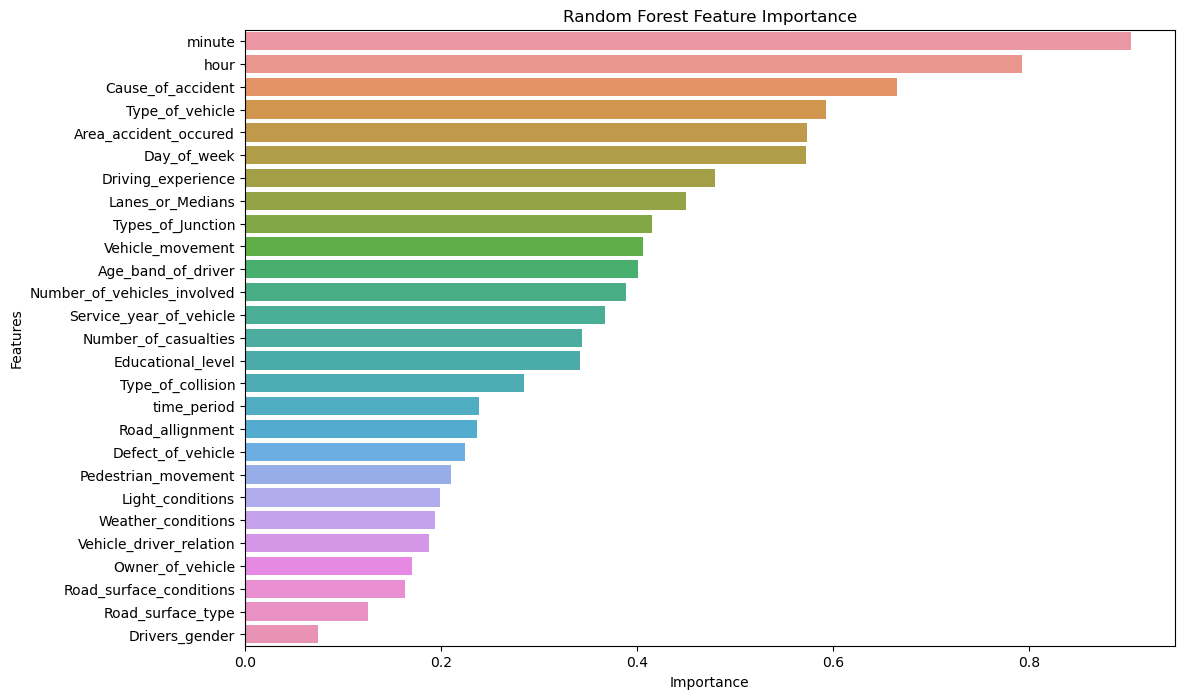

In [31]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances*10})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig("feature_importance_experment_1.png")
plt.show()

## E. Class Balancing

The traffic accident dataset used in the study is highly imbalanced, this leads model bias on the minority class. To balace them we use SMOTE techniques of class balancing.

In [32]:
# Use SMOTETomek for over-sampling and under-sampling
from imblearn.combine import SMOTETomek  # Import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_over, y_over = smote_tomek.fit_resample(X, y)
#X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [33]:
# Print class frequencies 
pd.Series(y_over).value_counts()

0    10776
2    10760
1    10760
Name: Accident_severity, dtype: int64

# Step3: Split data into training and testing sets
Splitting the cleaned data into two sets - a training set and a testing set. The training set is the set your model learns from. A testing set is used to check the accuracy of your model after training.

In [34]:
pd.get_dummies(data_encoded,drop_first=True).shape

(13063, 28)

In [35]:
X = pd.get_dummies(X, drop_first=True)

In [36]:
X.shape

(13063, 27)

In [37]:
# train test split
from sklearn.model_selection import cross_val_score, train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.2,random_state=42)

# Step4: Model Building

In [42]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# Bagging (Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Boosting (AdaBoost)
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)


# Boosting (XGBoost)
xgb_classifier = XGBClassifier(n_estimators=500, random_state=42)

# Train Boosting (XGBoost)
xgb_classifier.fit(X_train, y_train)

# Stacking
base_estimators = [
    ('et', DecisionTreeClassifier()),
    ('gb', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier())
]

stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Train Bagging (Random Forest)
rf_classifier.fit(X_train, y_train)

# Train Boosting (AdaBoost)
ada_classifier.fit(X_train, y_train)

# Evaluate XGBoost
xgb_score = accuracy_score(y_test, xgb_classifier.predict(X_test))

# Train Stacking
stacking_classifier.fit(X_train, y_train)

# Evaluate models
bagging_score = accuracy_score(y_test, rf_classifier.predict(X_test))
boosting_score = accuracy_score(y_test, ada_classifier.predict(X_test))
stacking_score = accuracy_score(y_test, stacking_classifier.predict(X_test))

print("Bagging (Random Forest) Accuracy:", bagging_score)
print("Boosting (AdaBoost) Accuracy:", boosting_score)
print("XGBoost Accuracy:", xgb_score)
print("Stacking Accuracy:", stacking_score)

Bagging (Random Forest) Accuracy: 0.9294117647058824
Boosting (AdaBoost) Accuracy: 0.708359133126935
XGBoost Accuracy: 0.9397832817337461
Stacking Accuracy: 0.9205882352941176


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predictions
rf_predictions = rf_classifier.predict(X_test)
ada_predictions = ada_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)
stacking_predictions = stacking_classifier.predict(X_test)

# Precision, Recall, F1-score
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')

ada_precision = precision_score(y_test, ada_predictions, average='weighted')
ada_recall = recall_score(y_test, ada_predictions, average='weighted')
ada_f1_score = f1_score(y_test, ada_predictions, average='weighted')

xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1_score = f1_score(y_test, xgb_predictions, average='weighted')

stacking_precision = precision_score(y_test, stacking_predictions, average='weighted')
stacking_recall = recall_score(y_test, stacking_predictions, average='weighted')
stacking_f1_score = f1_score(y_test, stacking_predictions, average='weighted')

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
ada_conf_matrix = confusion_matrix(y_test, ada_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
stacking_conf_matrix = confusion_matrix(y_test, stacking_predictions)

# Print Metrics
print("Bagging (Random Forest) Metrics:")
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1_score)
print("Confusion Matrix:")
print(rf_conf_matrix)

print("\nBoosting (AdaBoost) Metrics:")
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1-score:", ada_f1_score)
print("Confusion Matrix:")
print(ada_conf_matrix)

print("\nBoosting (XGBoost) Metrics:")
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1_score)
print("Confusion Matrix:")
print(xgb_conf_matrix)

print("\nStacking Metrics:")
print("Precision:", stacking_precision)
print("Recall:", stacking_recall)
print("F1-score:", stacking_f1_score)
print("Confusion Matrix:")
print(stacking_conf_matrix)


Bagging (Random Forest) Metrics:
Precision: 0.9292406825474719
Recall: 0.9294117647058824
F1-score: 0.9292957720486412
Confusion Matrix:
[[2129    1   13]
 [  20 1913  214]
 [  10  198 1962]]

Boosting (AdaBoost) Metrics:
Precision: 0.7064206062691593
Recall: 0.708359133126935
F1-score: 0.7071940593959606
Confusion Matrix:
[[1614  438   91]
 [ 492 1257  398]
 [ 113  352 1705]]

Boosting (XGBoost) Metrics:
Precision: 0.9403034542650485
Recall: 0.9397832817337461
F1-score: 0.9397014178080029
Confusion Matrix:
[[2131    0   12]
 [  10 1912  225]
 [  14  128 2028]]

Stacking Metrics:
Precision: 0.9218446207272051
Recall: 0.9205882352941176
F1-score: 0.9202737554498884
Confusion Matrix:
[[2107    2   34]
 [   1 2011  135]
 [  36  305 1829]]


In [57]:
# 1. Random Forest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
random_forest = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_features="sqrt",#log2
    max_depth=18,
    n_jobs=-1,
    random_state=42
)

random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=18, n_jobs=-1, random_state=42)

In [39]:
# 2. Light GBM algorithim
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(
    boosting_type='gbdt',
    learning_rate=0.05,
    n_estimators=700,
    random_state=42
)

lgb.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, n_estimators=700, random_state=42)

In [40]:
# 3. XGBoost
from xgboost import XGBClassifier
xgboost = XGBClassifier(
    n_estimators=1500,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=3,
    random_state=42
)

xgboost.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1500, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [41]:
# 4. Artificial Neural Network (ANN) - Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 64),
    activation='relu',
    solver='adam', #sgd
    alpha=0.001,
    max_iter=200, 
    random_state=42
)

mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(256, 64), random_state=42)

In [42]:
#5.  K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=5, 
    weights='distance',#uniform
    algorithm='auto', 
    leaf_size=30, 
    p=2,  # 2 for Euclidean distance
    n_jobs=-1
)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_jobs=-1, weights='distance')

In [43]:
# 6. Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(
    criterion='gini',    
    min_samples_split=2, 
    min_samples_leaf=1, 
    random_state=42
)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
# 7. AdaBoost
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(
    n_estimators=400,  
    learning_rate=0.5,  
    random_state=42
)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=400, random_state=42)

In [45]:
# 8. Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(
    C=0.5,  # Regularization parameter 
    solver='liblinear',  #'lbfgs', 'liblinear'
    max_iter=200,  
    random_state=42
)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=200, random_state=42, solver='liblinear')

In [46]:
#9 Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
Naive_bayes = GaussianNB()
Naive_bayes.fit(X_train, y_train)

GaussianNB()

In [47]:
# #10 Feed forward network (FNN)
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

In [48]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define the model
# fnn_model = Sequential()
# fnn_model.add(Dense(256, input_dim=27, activation='relu'))  # You can experiment with other activation functions here
# fnn_model.add(Dropout(0.5))
# fnn_model.add(Dense(128, activation='relu'))  # You can experiment with other activation functions here
# fnn_model.add(Dropout(0.5))
# fnn_model.add(Dense(64, activation='relu'))  # You can experiment with other activation functions here
# fnn_model.add(Dropout(0.5))
# fnn_model.add(Dense(3, activation='softmax'))

# # Compile the model with a different optimizer
# from tensorflow.keras.optimizers import RMSprop

# fnn_model.compile(optimizer=RMSprop(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# fnn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# y_pred_probs = fnn_model.predict(X_test_scaled)
# y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class labels

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
# recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
# f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass

# print(f'Test Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1 Score: {f1}')


In [49]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import Dense, Dropout

# # Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define the model
# mlp_model = Sequential()
# mlp_model.add(Dense(256, input_dim=27, activation='relu'))  # Increase the number of neurons
# mlp_model.add(Dropout(0.5))
# mlp_model.add(Dense(128, activation='relu'))  # Add another hidden layer
# mlp_model.add(Dropout(0.5))
# mlp_model.add(Dense(3, activation='softmax'))  # Output layer for multiclass (adjust based on your number of classes)

# # Compile the model
# mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# mlp_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# y_pred_probs = mlp_model.predict(X_test_scaled)
# y_pred = y_pred_probs.argmax(axis=1)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')  # 'micro', 'macro', 'weighted', or 'samples'
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Print metrics
# print(f'Test Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1 Score: {f1}')


In [50]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import SGD


# # Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define the model
# mlp_model = Sequential()
# mlp_model.add(Dense(512, input_dim=27, activation='relu'))  # Increase the number of neurons
# mlp_model.add(Dropout(0.5))
# mlp_model.add(Dense(256, activation='relu'))  # Add another hidden layer
# mlp_model.add(Dropout(0.5))
# mlp_model.add(Dense(128, activation='relu'))  # Add another hidden layer
# mlp_model.add(Dropout(0.5))
# mlp_model.add(Dense(3, activation='softmax'))  # Output layer for multiclass (adjust based on your number of classes)

# # Compile the model
# mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# #mlp_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# mlp_model.fit(X_train_scaled, y_train, epochs=25, batch_size=64, validation_split=0.2)

# # Evaluate the model on the test set
# y_pred_probs = mlp_model.predict(X_test_scaled)
# y_pred = y_pred_probs.argmax(axis=1)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')  # 'micro', 'macro', 'weighted', or 'samples'
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Print metrics
# print(f'Test Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1 Score: {f1}')


In [51]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# _train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define the model
# model = Sequential()
# model.add(Dense(128, input_dim=27, activation='relu'))  # Input layer
# model.add(Dropout(0.5))  # Dropout for regularization
# model.add(Dense(64, activation='relu'))  # Hidden layer
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))  # Output layer for multiclass classification

# # Compile the model
# model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# y_pred_probs = model.predict(X_test_scaled)
# y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class labels

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
# recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
# f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass

# print(f'Test Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1 Score: {f1}')





In [52]:
# print("X_train_scaled shape:", X_train_scaled.shape)
# print("y_train shape:", y_train.shape)


In [53]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from tensorflow.keras.optimizers import SGD

# # Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# mlp_model = Sequential()
# mlp_model.add(Dense(256, input_dim=27, activation='leaky_relu'))  # Increase the number of neurons
# mlp_model.add(Dropout(0.5))
# mlp_model.add(Dense(128, activation='leaky_relu'))  # Additional hidden layer
# mlp_model.add(Dropout(0.5))
# mlp_model.add(Dense(64, activation='leaky_relu'))
# mlp_model.add(Dropout(0.5))
# mlp_model.add(Dense(3, activation='softmax'))


# # Compile the model
# mlp_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# mlp_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# y_pred_probs = mlp_model.predict(X_test_scaled)
# y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class labels

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
# recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
# f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass

# print(f'Test Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1 Score: {f1}')


# Step5: Model evaluation and Validation

--- Random Forest ---
Accuracy: 0.91888545
F1-Score: 0.91869539
Precision: 0.91854003
Recall: 0.91888545
               
Confusion Matrix:
[[2120    8   15]
 [  34 1890  223]
 [  14  230 1926]]


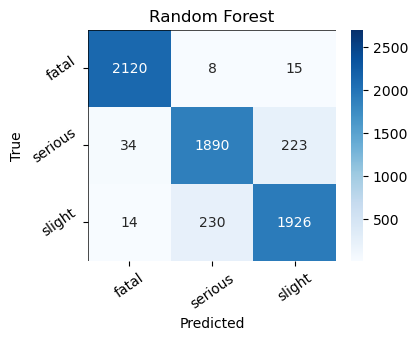

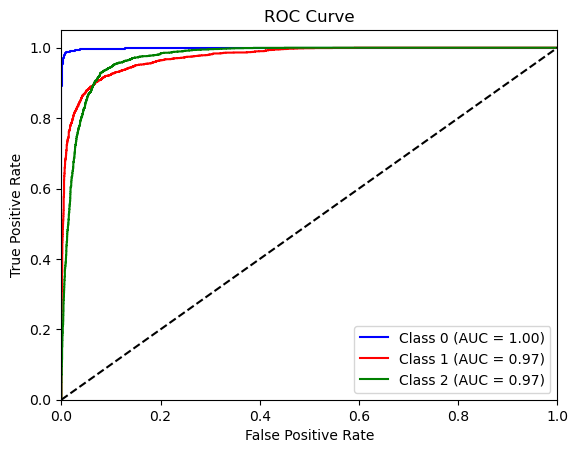


Cross-Validation Accuracy: 0.89927903

--- lightGBM ---
Accuracy: 0.92554180
F1-Score: 0.92537320
Precision: 0.92624728
Recall: 0.92554180
               
Confusion Matrix:
[[2122    2   19]
 [  20 1859  268]
 [  21  151 1998]]


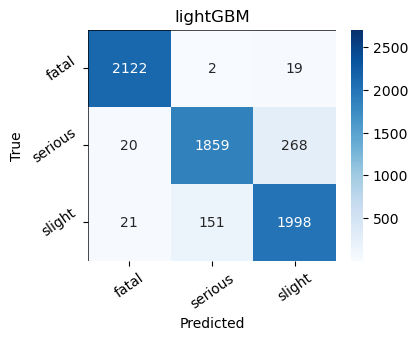

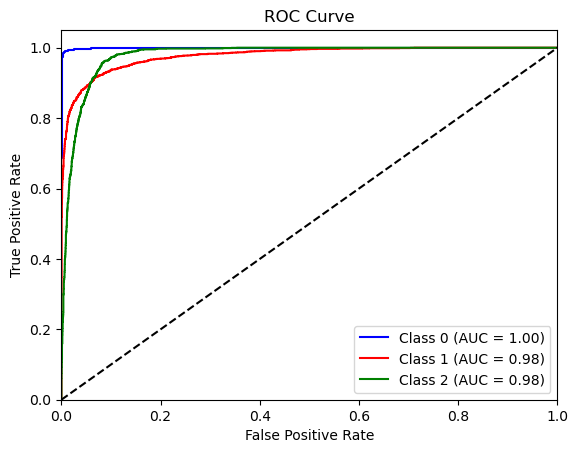


Cross-Validation Accuracy: 0.89798037

--- XGBoost ---
Accuracy: 0.93962848
F1-Score: 0.93953655
Precision: 0.93997263
Recall: 0.93962848
               
Confusion Matrix:
[[2132    0   11]
 [  12 1916  219]
 [  12  136 2022]]


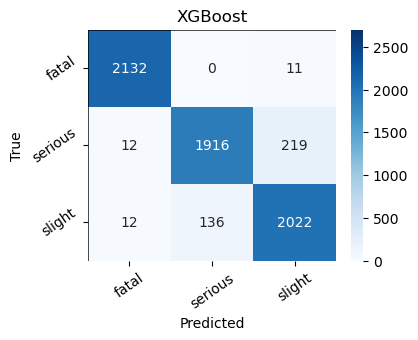

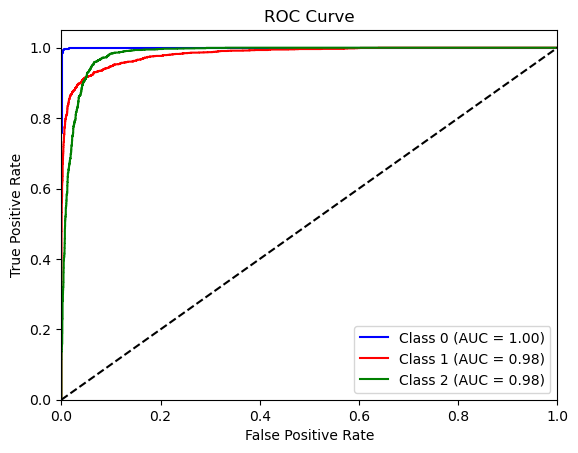


Cross-Validation Accuracy: 0.90454452

--- MLP ---
Accuracy: 0.90309598
F1-Score: 0.90180285
Precision: 0.90596875
Recall: 0.90309598
               
Confusion Matrix:
[[2128    6    9]
 [  13 1998  136]
 [  73  389 1708]]


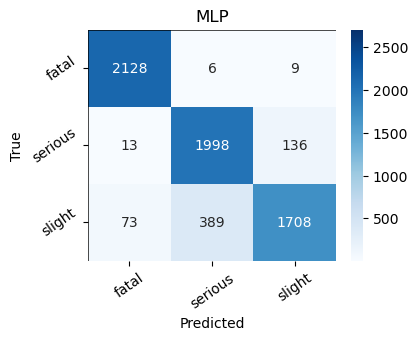

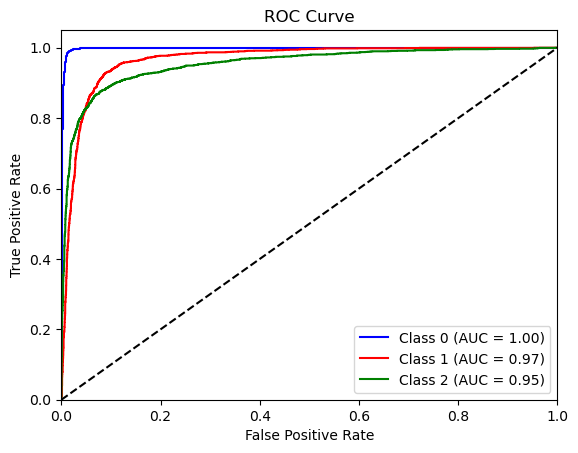


Cross-Validation Accuracy: 0.87608624

--- KNN ---
Accuracy: 0.81965944
F1-Score: 0.79973807
Precision: 0.85864528
Recall: 0.81965944
               
Confusion Matrix:
[[2143    0    0]
 [   9 2128   10]
 [ 351  795 1024]]


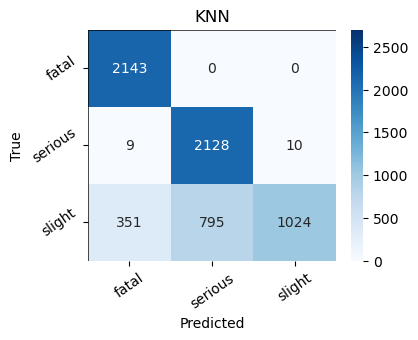

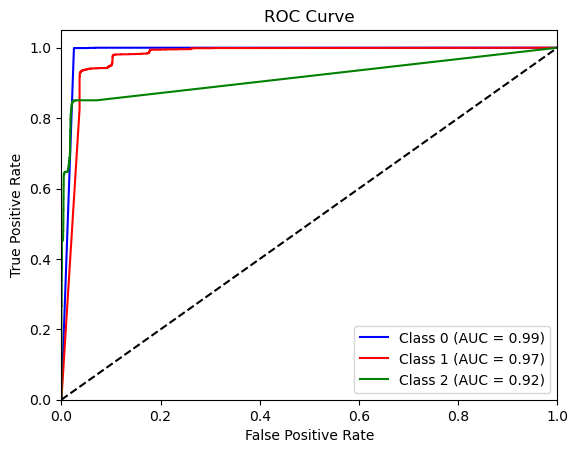


Cross-Validation Accuracy: 0.81418754

--- Decision Tree ---
Accuracy: 0.82554180
F1-Score: 0.82367527
Precision: 0.82422426
Recall: 0.82554180
               
Confusion Matrix:
[[2067   38   38]
 [ 109 1701  337]
 [  98  507 1565]]


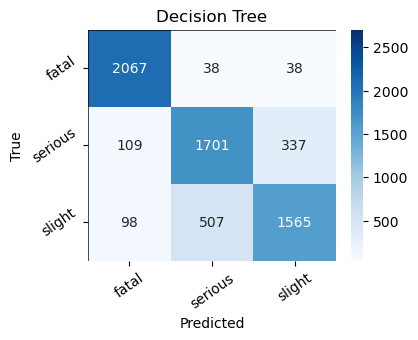

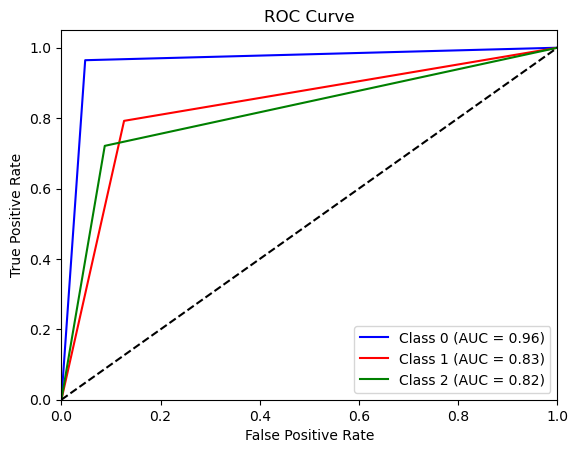


Cross-Validation Accuracy: 0.81347742

--- AdaBoost ---
Accuracy: 0.71996904
F1-Score: 0.71932138
Precision: 0.71882176
Recall: 0.71996904
               
Confusion Matrix:
[[1594  457   92]
 [ 448 1309  390]
 [  83  339 1748]]


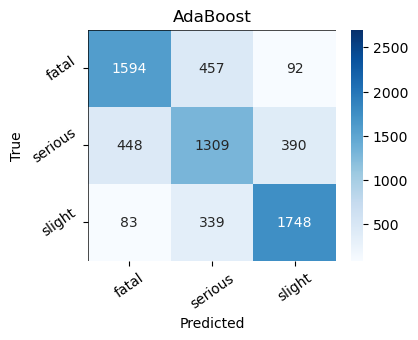

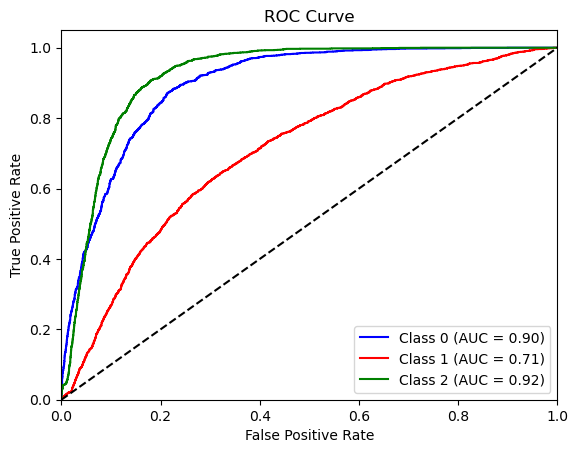


Cross-Validation Accuracy: 0.69940924

--- Logistic Regression ---
Accuracy: 0.55371517
F1-Score: 0.54834961
Precision: 0.54912392
Recall: 0.55371517
               
Confusion Matrix:
[[1311  490  342]
 [ 717  848  582]
 [ 394  358 1418]]


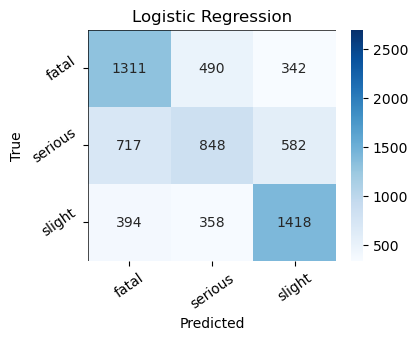

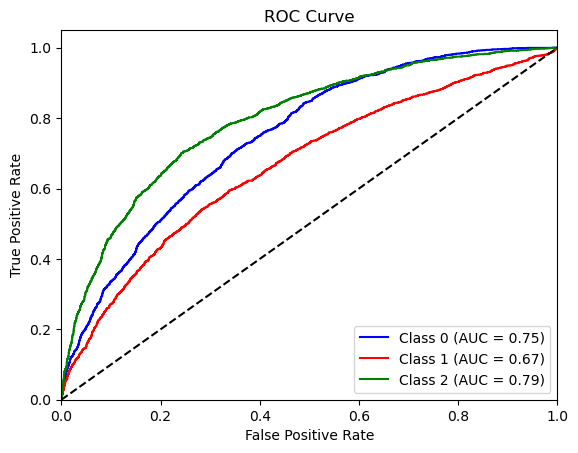


Cross-Validation Accuracy: 0.54112179

--- Naive Bayes ---
Accuracy: 0.51873065
F1-Score: 0.50296109
Precision: 0.53285942
Recall: 0.51873065
               
Confusion Matrix:
[[1622  316  205]
 [1123  602  422]
 [ 726  317 1127]]


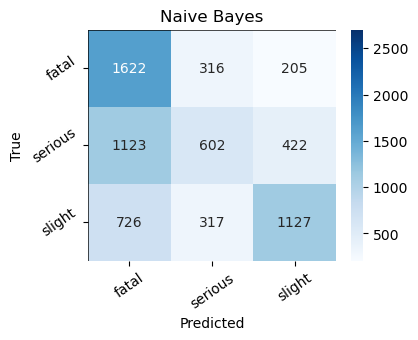

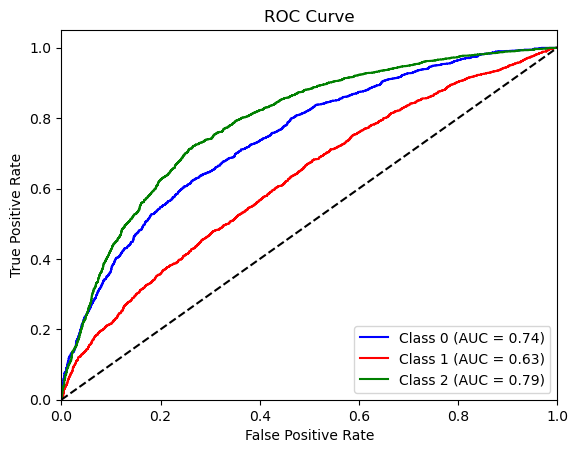


Cross-Validation Accuracy: 0.51148908



In [66]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,make_scorer, auc
#pip install scikit-plot
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

# Define a function to calculate and print performance metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.8f}")
    print(f"F1-Score: {f1:.8f}")
    print(f"Precision: {precision:.8f}")
    print(f"Recall: {recall:.8f}")
    print("               ")
    # Class names
    class_names = ['fatal', 'serious', 'slight']
    
    # Confusion Matrix
    #custom_cmap = LinearSegmentedColormap.from_list('custom', ['#989b9e', '#36109e','#63109e'])
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    

    plt.figure(figsize=(4, 3))
    
    # Plot the outer boundary
    plt.plot([0, len(class_names)], [0, 0], color='black', linewidth=0.5)
    plt.plot([0, 0], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([len(class_names), len(class_names)], [0, len(class_names)], color='black', linewidth=0.5)
    plt.plot([0, len(class_names)], [len(class_names), len(class_names)], color='black', linewidth=0.5)
    
    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',vmax=2700)
    plt.gca().set_frame_on(False)
    
    # Rotate the class names by 35 degrees
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name}')
    plt.show()

    if hasattr(model, 'predict_proba'):
        y_scores = model.predict_proba(X_test)

        n_classes = y_scores.shape[1]
        y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='black', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        print()
    else:
        print("AUC: Not available for this model.\n")

# Perform evaluation for each model
models = [random_forest, lgb, xgboost, mlp, knn, decision_tree, adaboost,logistic_regression, Naive_bayes]
model_names = ['Random Forest', 'lightGBM', 'XGBoost', 'MLP', 'KNN', 'Decision Tree', 'AdaBoost', 'Logistic Regression', 'Naive Bayes']

for model, name in zip(models, model_names):
    print(f"--- {name} ---")
    evaluate_model(model, X_test, y_test)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_over,y_over, cv=5, scoring=make_scorer(accuracy_score))
    #print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.8f}\n")
   



--- Random Forest ---
Accuracy: 0.91888545
F1-Score: 0.91884246
Precision: 0.91854003
Recall: 0.91888545

Random Forest Confusion Matrix
[[2120    8   15]
 [  34 1890  223]
 [  14  230 1926]]


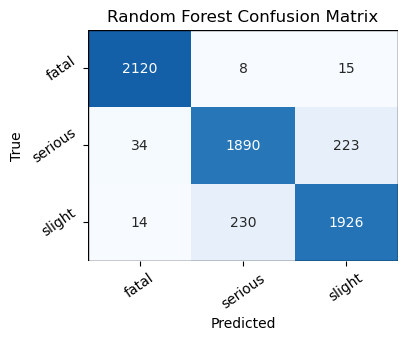

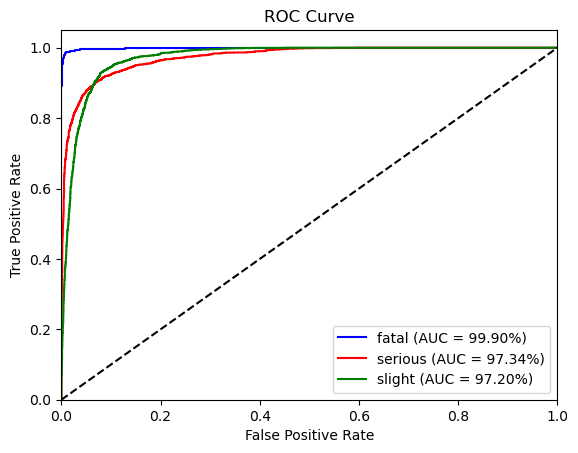


Cross-Validation Scores: [0.78374613 0.93420034 0.95107602 0.94225112 0.88512154]
Cross-Validation Accuracy: 0.89927903

--- lightGBM ---
Accuracy: 0.92554180
F1-Score: 0.92551203
Precision: 0.92624728
Recall: 0.92554180

lightGBM Confusion Matrix
[[2122    2   19]
 [  20 1859  268]
 [  21  151 1998]]


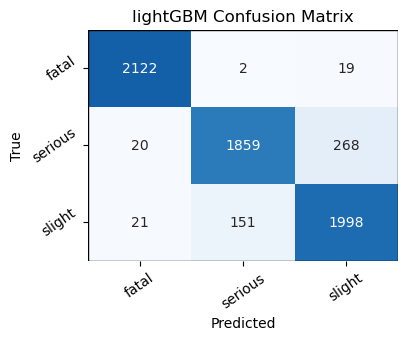

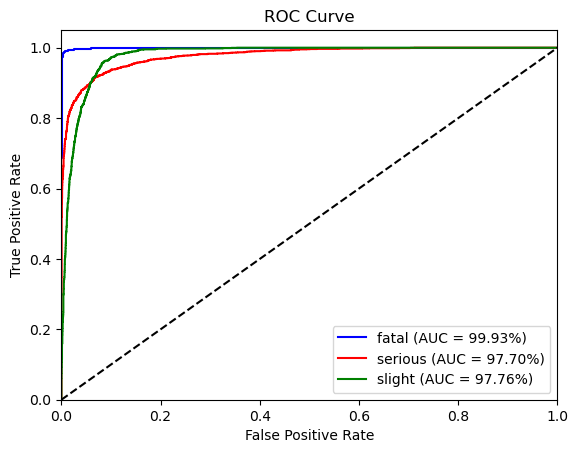


Cross-Validation Scores: [0.72399381 0.95959127 0.96377148 0.95881715 0.88372813]
Cross-Validation Accuracy: 0.89798037

--- XGBoost ---
Accuracy: 0.93962848
F1-Score: 0.93965838
Precision: 0.93997263
Recall: 0.93962848

XGBoost Confusion Matrix
[[2132    0   11]
 [  12 1916  219]
 [  12  136 2022]]


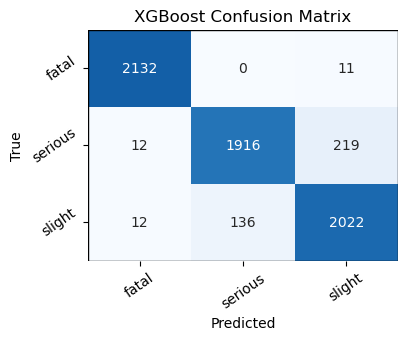

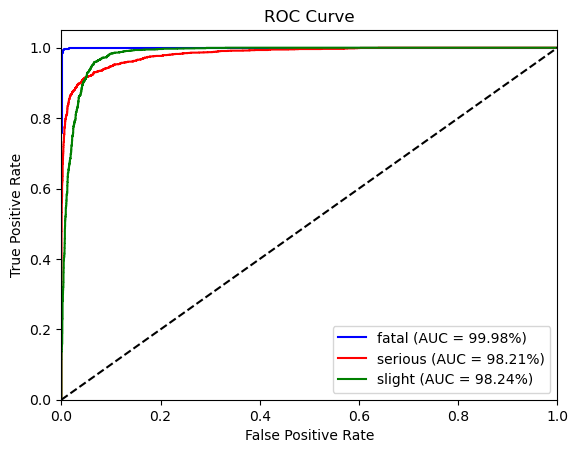


Cross-Validation Scores: [0.73467492 0.96144914 0.96717758 0.96640347 0.89301749]
Cross-Validation Accuracy: 0.90454452

--- MLP ---
Accuracy: 0.90309598
F1-Score: 0.90203757
Precision: 0.90596875
Recall: 0.90309598

MLP Confusion Matrix
[[2128    6    9]
 [  13 1998  136]
 [  73  389 1708]]


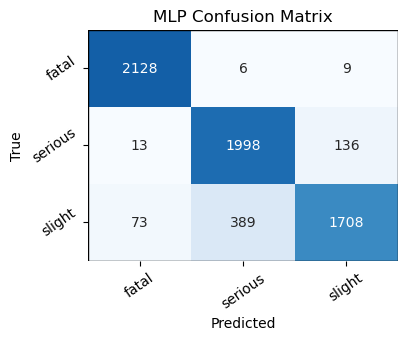

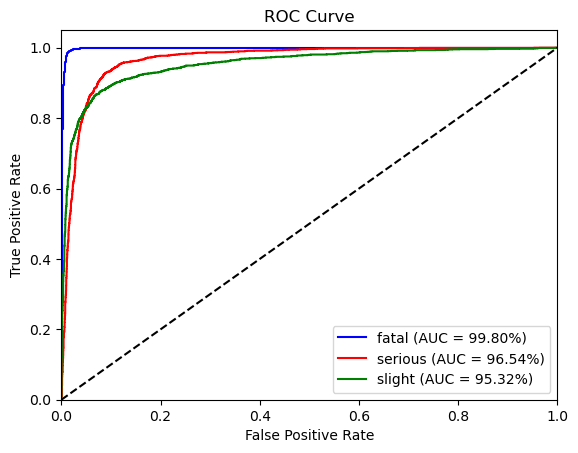


Cross-Validation Scores: [0.79489164 0.91082211 0.91407339 0.90230686 0.8583372 ]
Cross-Validation Accuracy: 0.87608624

--- KNN ---
Accuracy: 0.81965944
F1-Score: 0.80038757
Precision: 0.85864528
Recall: 0.81965944

KNN Confusion Matrix
[[2143    0    0]
 [   9 2128   10]
 [ 351  795 1024]]


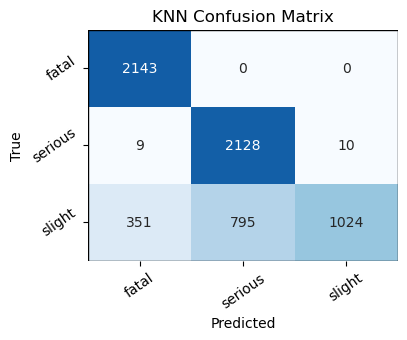

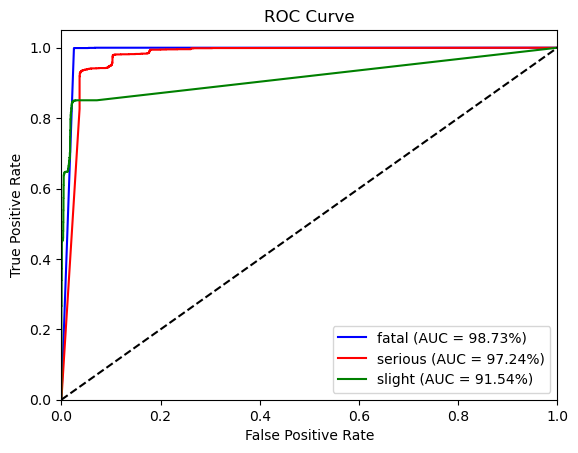


Cross-Validation Scores: [0.81346749 0.8126645  0.81808329 0.81932188 0.80740053]
Cross-Validation Accuracy: 0.81418754

--- Decision Tree ---
Accuracy: 0.82554180
F1-Score: 0.82396679
Precision: 0.82422426
Recall: 0.82554180

Decision Tree Confusion Matrix
[[2067   38   38]
 [ 109 1701  337]
 [  98  507 1565]]


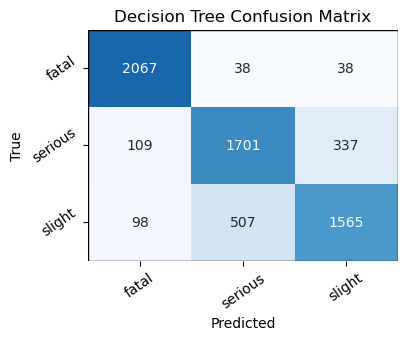

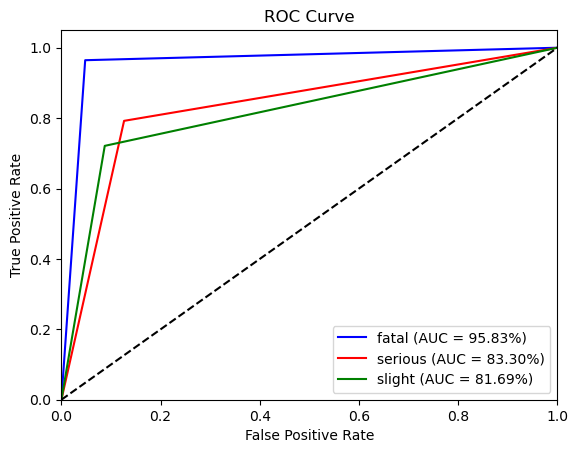


Cross-Validation Scores: [0.74674923 0.8344945  0.8365072  0.83805543 0.81158074]
Cross-Validation Accuracy: 0.81347742

--- AdaBoost ---
Accuracy: 0.71996904
F1-Score: 0.71906993
Precision: 0.71882176
Recall: 0.71996904

AdaBoost Confusion Matrix
[[1594  457   92]
 [ 448 1309  390]
 [  83  339 1748]]


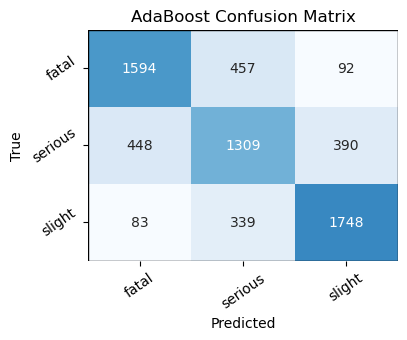

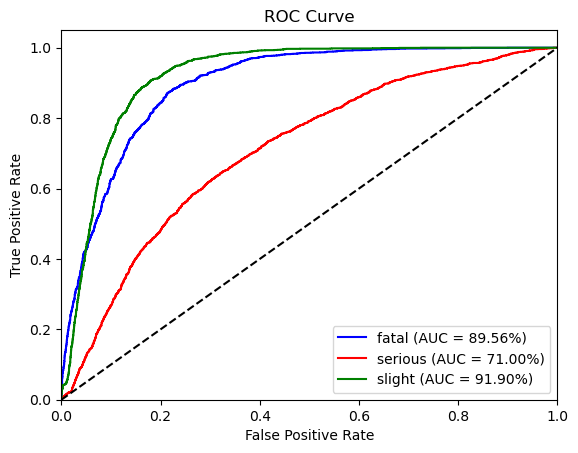


Cross-Validation Scores: [0.57848297 0.74531661 0.76079889 0.74624555 0.6662022 ]
Cross-Validation Accuracy: 0.69940924

--- Logistic Regression ---
Accuracy: 0.55371517
F1-Score: 0.54807940
Precision: 0.54912392
Recall: 0.55371517

Logistic Regression Confusion Matrix
[[1311  490  342]
 [ 717  848  582]
 [ 394  358 1418]]


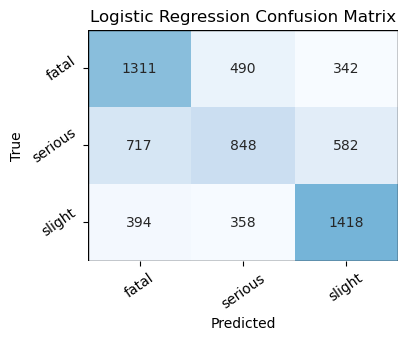

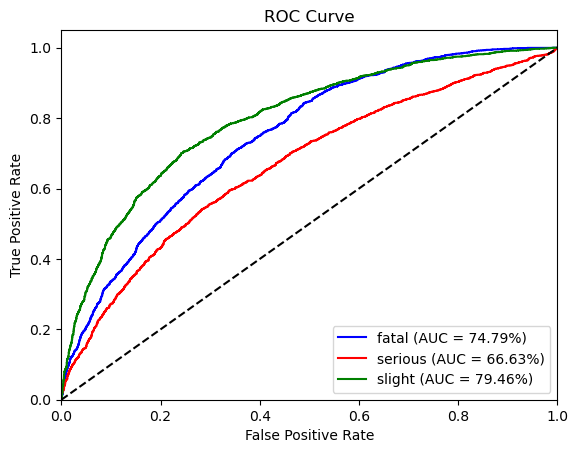


Cross-Validation Scores: [0.47167183 0.56618672 0.57532126 0.55411054 0.53831863]
Cross-Validation Accuracy: 0.54112179

--- Naive Bayes ---
Accuracy: 0.51873065
F1-Score: 0.50275245
Precision: 0.53285942
Recall: 0.51873065

Naive Bayes Confusion Matrix
[[1622  316  205]
 [1123  602  422]
 [ 726  317 1127]]


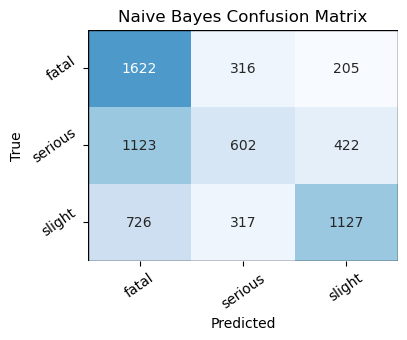

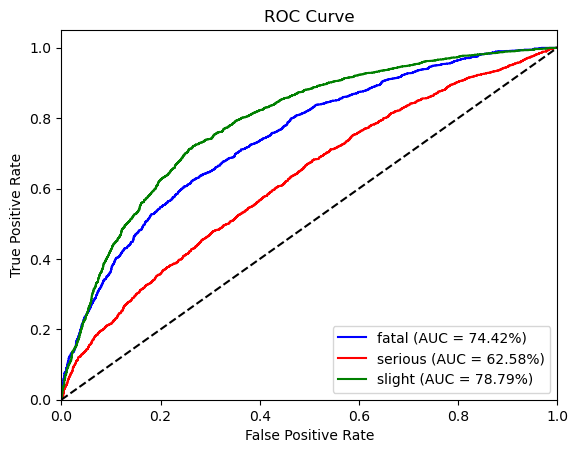


Cross-Validation Scores: [0.46021672 0.52856479 0.53305465 0.52361047 0.51199876]
Cross-Validation Accuracy: 0.51148908



In [63]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate and print performance metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Class names
    class_names = ['fatal', 'serious', 'slight']
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.8f}")
    print(f"F1-Score: {f1:.8f}")
    print(f"Precision: {precision:.8f}")
    print(f"Recall: {recall:.8f}")
    print()
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name} Confusion Matrix')
    print(cm)
    
    cmap_custom = sns.color_palette(["#6e9399", "#510857"])
    plt.figure(figsize=(4, 3))
    # Create a heatmap for the confusion matrix
    # Plot the outer boundary
    plt.plot([0, len(class_names)], [0, 0], color='black', linewidth=1)
    plt.plot([0, 0], [0, len(class_names)], color='black', linewidth=1)
    plt.plot([len(class_names), len(class_names)], [0, len(class_names)], color='black', linewidth=1)
    plt.plot([0, len(class_names)], [len(class_names), len(class_names)], color='black', linewidth=1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',vmax=2600,cbar=False)
    
    # Rotate the class names by 35 degrees
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=35)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{name} Confusion Matrix')

    if hasattr(model, 'predict_proba'):
        n_classes = len(np.unique(y_test))
        y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

        y_scores = model.predict_proba(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # Create a single plot for all classes
        plt.figure()
        colors = ['blue', 'red', 'green']
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
            # Plot ROC curve for each class
            plt.plot(fpr[i], tpr[i], color=colors[i], label=f'{class_names[i]} (AUC = {roc_auc[i]*100:.2f}%)')

        plt.plot([0, 1], [0, 1], color='black', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        print()
    else:
        print("AUC: Not available for this model.\n")

# Perform evaluation for each model
models = [random_forest, lgb, xgboost, mlp, knn, decision_tree, adaboost,logistic_regression, Naive_bayes]
model_names = ['Random Forest', 'lightGBM', 'XGBoost', 'MLP', 'KNN', 'Decision Tree', 'AdaBoost', 'Logistic Regression', 'Naive Bayes']
for model, name in zip(models, model_names):
    print(f"--- {name} ---")
    evaluate_model(model, X_test, y_test)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_over, y_over, cv=5, scoring=make_scorer(accuracy_score))
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.8f}\n")
